### 6.1.1 업비트 API
* Access key: Unas4VcrAtOIRODoPzS3PDX9raWNQdyuqTisk9c8
* Secret key: o5RxPav2vRd8pwrSD66YcYpK14z663nkCnZmOpps

### 6.1.2 Upbit 클래스 생성

In [1]:
!pip install pyupbit


[notice] A new release of pip available: 22.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pyupbit

In [3]:
acs_key = 'Unas4VcrAtOIRODoPzS3PDX9raWNQdyuqTisk9c8'
sec_key = 'o5RxPav2vRd8pwrSD66YcYpK14z663nkCnZmOpps'

In [4]:
upbit = pyupbit.Upbit(acs_key, sec_key)

### 6.1.3 잔고 조회

In [21]:
balance = upbit.get_balances()
balance

[]

In [10]:
import time

for ticker in pyupbit.get_tickers():
    balance = upbit.get_balance(ticker)
    print(ticker, ':', balance)
    time.sleep(0.1)

KRW-BTC : 0
KRW-ETH : 0
BTC-ETH : 0
BTC-XRP : 0
BTC-ETC : 0
BTC-CVC : 0
BTC-DGB : 0
BTC-SC : 0
BTC-SNT : 0
BTC-WAVES : 0
BTC-NMR : 0
BTC-XEM : 0
BTC-QTUM : 0
BTC-BAT : 0
BTC-LSK : 0
BTC-STEEM : 0
BTC-DOGE : 0
BTC-BNT : 0
BTC-XLM : 0
BTC-ARDR : 0
BTC-ARK : 0
BTC-STORJ : 0
BTC-GRS : 0
BTC-RLC : 0
USDT-BTC : 0
USDT-ETH : 0
USDT-XRP : 0
USDT-ETC : 0
KRW-NEO : 0
KRW-MTL : 0
KRW-XRP : 0
KRW-ETC : 0
KRW-SNT : 0
KRW-WAVES : 0
KRW-XEM : 0
KRW-QTUM : 0
KRW-LSK : 0
KRW-STEEM : 0
KRW-XLM : 0
KRW-ARDR : 0
KRW-ARK : 0
KRW-STORJ : 0
KRW-GRS : 0
KRW-ADA : 0
BTC-ADA : 0
BTC-MANA : 0
KRW-SBD : 0
BTC-SBD : 0
KRW-POWR : 0
BTC-POWR : 0
KRW-BTG : 0
USDT-ADA : 0
BTC-DNT : 0
BTC-ZRX : 0
BTC-TRX : 0
BTC-TUSD : 0
BTC-LRC : 0
KRW-ICX : 0
KRW-EOS : 0
USDT-TUSD : 0
KRW-TRX : 0
BTC-POLYX : 0
USDT-SC : 0
USDT-TRX : 0


KeyboardInterrupt: 

### 6.1.4 매수
    buy_limit_order(티커, 지정가, 매수수량)
> 반환값: (주문 종류, 티커, 주문 번호)

In [22]:
order = upbit.buy_limit_order('KRW-XRP', 100, 20)
print(order)

UnderMinTotalBid
None


> 지정가 매수 시, **최소 주문 수량 / 유효 자릿수 / 호가 단위**에 유의할 것  
  
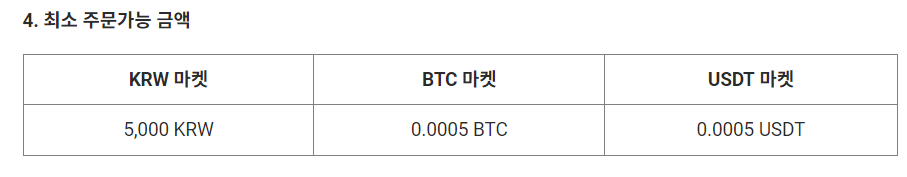

In [14]:
order = upbit.buy_limit_order('BTC-ETH', 400100, 0.001)
print(order)

{'error': {'message': '최대 주문 가능 금액 20 BTC 보다 작은 주문을 입력해 주세요.', 'name': 'over_krw_funds_bid'}}


    buy_market_order(티커, 매수수량)
> 최우선 매도호가

In [17]:
order = upbit.buy_market_order('BTC-ETH', 1)
print(order)

InsufficientFundsBid
None


> 시장가 주문 시, **최소 주문 수량 / 유효 자릿수**에 유의할 것

In [18]:
krw = upbit.get_balance('BTC-ETH')[2]
orderbook = pyupbit.get_orderbook('BTC-ETH')

TypeError: 'int' object is not subscriptable

In [19]:
# 원화 잔고를 최우선 매도 호가 금액으로 나누면 매수 수량을 구할 수 있음
asks = orderbook['asks']
sell_price = asks[0]['price']
unit = krw/sell_price
unit

NameError: name 'orderbook' is not defined

In [ ]:
# 주문할 비트코인 개수를 계산 후 시장가 주문 발행
order = upbit.buy_market_order('BTC-ETH', unit)
order

### 6.1.5 매도

In [20]:
order = upbit.sell_limit_order('BTC-ETH', 4000000, 1)
order

{'error': {'name': 'over_krw_funds_ask',
  'message': '최대 주문 가능 금액 20 BTC 보다 작은 주문을 입력해 주세요.'}}

In [ ]:
# 잔고 조회 후 보유중인 수량 만큼 지정가 매도
unit = upbit.get_balance('BTC-ETH')[0]
print(unit)

order = upbit.sell_limit_order('BTC-ETH', 4000000, unit)
print(order)

In [23]:
# 지정가 매도
unit = upbit.get_balance('BTC-ETH')[0]
order = upbit.sell_limit_order('BTC-ETH', 4000100, unit)
order

TypeError: 'int' object is not subscriptable

In [ ]:
# 시장가 매도
unit = upbit.get_balance('BTC-ETH')[0]
order = upbit.sell_market_order('BTC-ETH', unit)
order

### 6.1.6 주문 최소
    cancel_order(주문ID가_포함된_튜플)    
> 주문 취소 성공: True  
> 주문 취소 실패: False

In [24]:
import time

In [ ]:
order = upbit.buy_limit_order('BTC-ETH', 3000000, 0.001)
print(order)

time.sleep(10)
cancel = upbit.cancel_order(order)
print(cancel)